In [4]:
# 4th order GLLE equation continuation

In [1]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.io import savemat

# virtual display to use AUTO plot function
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [2]:
# parameters to start with
# these should match what is used in LLEstart.ipynb, since that generates
# initial data that is used here
P = 9.
theta = 9.

In [23]:
# generates initial bifurcation curve, just for reference
# continuation from "branch points" on this curve will not, in general, work

# start AUTO with runner object
runner = ra.runAUTO()

# run AUTO script from initial condition P=0
# specify theta as PAR 2
# UZSTOP tells AUTO when to stop the continuation
r1 = ac.run(e='LLE4', c='LLE4', runner=runner, PAR={2 : theta}, UZSTOP={1: [12, 0 ]})

# extract and save AUTO data

# bifurcation diagram
bd = { "par"       : r1[0].coordarray[0,:], 
       "L2norm"    : r1[0].coordarray[1,:]
     }

# individual solutions
sols = [ {  "u"     : np.array( [ s['U('+str(j)+')'] for j in range(1,5) ]  ),
            "t"     : np.array( s['t'] ), 
            "P"     : s.PAR(1),
            "theta" : s.PAR(2),
            "norm"  : s['L2-NORM']
         } for s in r1() ]

# export to MATLAB
mdic = { 'sols' : sols, 'bd' : bd }
savemat('LLE0.mat', mdic)

Starting LLE4 ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      MAX U(4)      MAX U(5)      MAX U(6)   
   1     1  EP    1   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1    20        2   1.63996E+00   1.81762E-01   2.01453E-02  -1.80642E-01   1.15048E-17   1.11769E-16   1.05090E-17   9.41556E-17
   1    40        3   3.62712E+00   4.08002E-01   4.58947E-02  -4.05412E-01   1.51246E-17   2.79673E-16   2.10670E-17   2.10791E-16
   1    60        4   5.61242E+00   6.49909E-01   7.52582E-02  -6.45537E-01   3.04511E-17   4.86183E-16   6.01878E-17   3.56949E-16
   1    80        5   7.59329E+00   9.25487E-01   1.12800E-01  -9.18587E-01   3.86259E-17   4.42577E-16   6.38718E-17   5.01942E-16
   1   100        6   9.55881E+00   1.29195E+00   1.74616E-01  -1.28009E+00   7.58895E-17   5.30877E-16   9.75079E-17   4.60005E-16
   1   112  LP    7   1.05356E+01   1.76430E+00   2.9544

   1   265  BP   62   4.62123E+00   3.17170E+00   2.17684E+00   2.30674E+00   1.43262E-14   1.52111E-14   2.45267E-14   2.71701E-14
   1   268  BP   63   4.88390E+00   3.18760E+00   2.08047E+00   2.41505E+00   2.95163E-15   4.50692E-15   6.94108E-15   8.53825E-15
   1   271  BP   64   5.06336E+00   3.19804E+00   2.01990E+00   2.47941E+00   3.52983E-15   4.61229E-15   8.57529E-15   1.01572E-14
   1   273  BP   65   5.15417E+00   3.20322E+00   1.99073E+00   2.50949E+00   4.30292E-15   6.50090E-15   1.03404E-14   1.36099E-14
   1   277  BP   66   5.52319E+00   3.22355E+00   1.88139E+00   2.61757E+00   1.11909E-14   9.64081E-15   1.51704E-14   1.51395E-14
   1   280       67   5.80513E+00   3.23847E+00   1.80663E+00   2.68771E+00   6.56569E-15   7.73164E-15   1.12726E-14   1.66927E-14
   1   286  BP   68   6.28194E+00   3.26272E+00   1.69459E+00   2.78813E+00   3.46902E-15   5.09717E-15   6.24809E-15   1.09228E-14
   1   288  BP   69   6.47450E+00   3.27221E+00   1.65377E+00   2.82354E+00 

   1   461  BP  125   2.13984E+01   3.81116E+00   6.78784E-01   3.75022E+00   6.46439E-15   4.02057E-14   1.49601E-14   9.89320E-14
   1   463  BP  126   2.14983E+01   3.81407E+00   6.76664E-01   3.75357E+00   4.02781E-15   2.06915E-14   9.21247E-15   4.75685E-14
   1   467  BP  127   2.18980E+01   3.82569E+00   6.68366E-01   3.76686E+00   3.98645E-15   2.22807E-14   8.85914E-15   5.61202E-14
   1   469  BP  128   2.19980E+01   3.82858E+00   6.66336E-01   3.77015E+00   2.12297E-15   1.31592E-14   5.09851E-15   3.40696E-14
   1   475  BP  129   2.24005E+01   3.84016E+00   6.58328E-01   3.78331E+00   5.01374E-14   3.53551E-13   1.20865E-13   8.56428E-13
   1   477  BP  130   2.25004E+01   3.84302E+00   6.56381E-01   3.78655E+00   1.18919E-14   7.68373E-14   2.80333E-14   1.83529E-13
   1   479  BP  131   2.26834E+01   3.84825E+00   6.52858E-01   3.79247E+00   4.46727E-15   2.73310E-14   1.02175E-14   6.84461E-14
   1   480      132   2.27833E+01   3.85109E+00   6.50956E-01   3.79568E+00 

Created plot


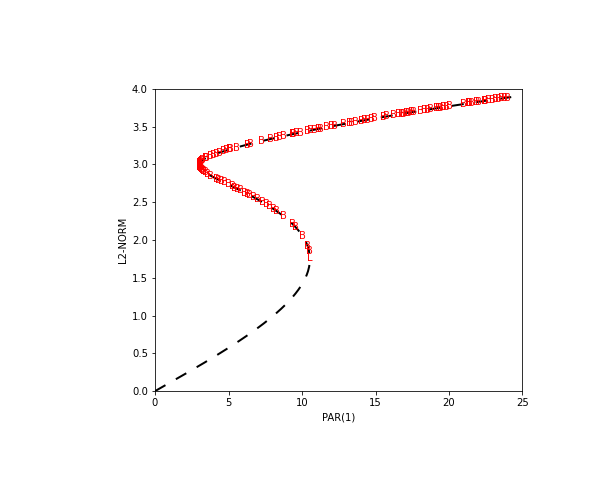

In [24]:
# plot bifurcation diagram using AUTO plot routine

p = ac.plot(r1)
p.config(type='bifurcation')
p.config(grid=False)
p.config(stability=True)
p.savefig('b.png')
display(Image.open('b.png'))

In [27]:
# follow solutions starting at generated solution from LLEstart.ipynb
# some branch points are bogus, some might not be

# run continuation from this solution
# NMX is max number of steps
# DS is size of first step: initial direction of continuation is positive or negative based on sign of this
r2 = ac.run(e='LLE4', c='LLE4.1', runner=runner, DS=0.01, NMX=250, PAR={1 : P, 2 : theta})

# extract and save AUTO data

# bifurcation diagram
bd2 = { "par"       : r2[0].coordarray[0,:], 
       "L2norm"     : r2[0].coordarray[1,:]
     }

# individual solutions
sols2 = [ { "u"     : np.array( [ s['U('+str(j)+')'] for j in range(1,5) ]  ),
            "t"     : np.array( s['t'] ), 
            "P"     : s.PAR(1),
            "theta" : s.PAR(2),
            "norm"  : s['L2-NORM']
         } for s in r2() ]

# export to MATLAB
mdic = { 'sols2' : sols2, 'bd2' : bd2 }
savemat('LLEbranch2.mat', mdic)

Starting LLE4 ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      MAX U(4)      MAX U(5)      PAR(3)     
   1     1  EP    1   9.00000E+00   2.37212E+00   1.53534E+00   4.16601E+00   1.10042E+00   3.75927E+00   9.72413E-01   0.00000E+00
   1     3  BP    2   8.88681E+00   2.36761E+00   1.55049E+00   4.15426E+00   1.11306E+00   3.75430E+00   9.79484E-01   1.21209E-09
   1     8  BP    3   8.89481E+00   2.36893E+00   1.54935E+00   4.15495E+00   1.11222E+00   3.75599E+00   9.79016E-01   1.92725E-14
   1    10        4   8.90851E+00   2.37120E+00   1.54765E+00   4.15689E+00   1.11093E+00   3.75866E+00   9.78035E-01   1.10803E-12
   1    13  BP    5   8.96708E+00   2.38094E+00   1.54010E+00   4.16396E+00   1.10491E+00   3.77094E+00   9.75208E-01  -2.09660E-13
   1    19  BP    6   9.44367E+00   2.46456E+00   1.48414E+00   4.21765E+00   1.06022E+00   3.86977E+00   9.55554E-01  -1.54836E-12
   1    20        7   9.53623E+00   2.48196E+00   1.4747

   1   165  BP   62   3.35887E+00   2.32207E+00   3.43858E+00   1.94944E+00   2.47627E+00   1.57695E+00   1.90897E+00  -5.03365E-10
   1   169  BP   63   3.30130E+00   2.32547E+00   3.46680E+00   1.88128E+00   2.48531E+00   1.52802E+00   1.89424E+00  -5.79328E-10
   1   170       64   3.28200E+00   2.32657E+00   3.47837E+00   1.85291E+00   2.49037E+00   1.50763E+00   1.89252E+00  -5.71643E-10
   1   171  BP   65   3.26161E+00   2.32774E+00   3.49159E+00   1.82019E+00   2.49655E+00   1.48399E+00   1.89201E+00  -5.46858E-10
   1   174  BP   66   3.20774E+00   2.33093E+00   3.52998E+00   1.72026E+00   2.51686E+00   1.41178E+00   1.89572E+00  -2.89483E-10
   1   180       67   3.04624E+00   2.34352E+00   3.66965E+00   1.29179E+00   2.59312E+00   1.10020E+00   1.92956E+00  -4.19694E-10
   1   190  LP   68   2.88814E+00   2.38326E+00   3.80153E+00   1.06010E-01   2.64158E+00   2.67690E-01   2.00936E+00  -6.82884E-10
   1   193  BP   69   2.90460E+00   2.39936E+00   3.80410E+00   3.83619E-01 

Created plot


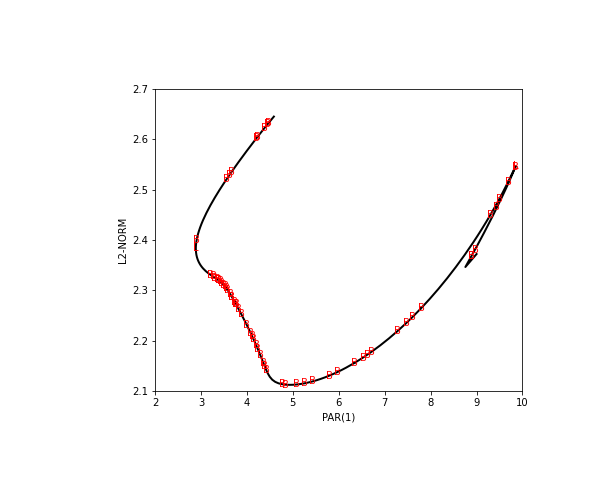

In [28]:
# plot bifurcation diagram using AUTO plot routine

p = ac.plot(r2)
p.config(type='bifurcation')
p.config(grid=False)
p.savefig('b.png')
display(Image.open('b.png'))

In [19]:
# follow solutions on one of the branches from branch just found
# this might not work

# ISW=-1 performs branch switching
# r1('BP1') indicates first branch point, etc
# r1(51) starts from label 51, etc
r3 = ac.run(r2('BP18'), c='LLE4.1', ISW=-1, NMX=50, DS=0.01, PAR = {2 : theta}, runner=runner)

# extract and save AUTO data

# bifurcation diagram
bd3 = { "par"       : r3[0].coordarray[0,:], 
       "L2norm"     : r3[0].coordarray[1,:]
     }

# individual solutions
sols3 = [ { "u"     : np.array( [ s['U('+str(j)+')'] for j in range(1,5) ]  ),
            "t"     : np.array( s['t'] ), 
            "P"     : s.PAR(1),
            "theta" : s.PAR(2),
            "norm"  : s['L2-NORM']
         } for s in r3() ]

# export to MATLAB
mdic = { 'sols3' : sols3, 'bd3' : bd3 }
savemat('LLEbranch3.mat', mdic)

Starting LLE4 ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      MAX U(4)      MAX U(5)      PAR(3)     
   2     2  MX   65   5.99858E+00   2.94295E+00   2.68032E+00   3.15190E+00   1.79805E+00   2.94357E+00   1.93892E+00  -1.64783E-11

 Total Time    0.127E+01
LLE4 ... done


Created plot


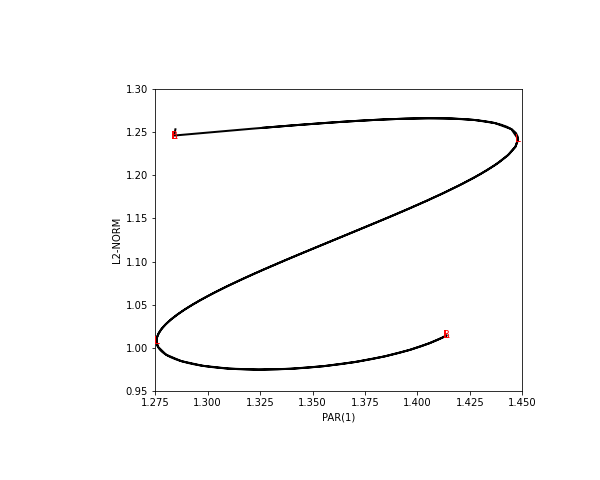

In [84]:
# plot bifurcation diagram using AUTO plot routine

p = ac.plot(r3)
p.config(type='bifurcation')
p.config(grid=False)
p.savefig('b.png')
display(Image.open('b.png'))